In [2]:
import pandas as pd
import pickle 

In [3]:
# Load the CSV file into a DataFrame
predictive_df = pd.read_csv('../data\predictive_df.csv')
filtered_df = pd.read_csv('../data\\filtered_df.csv')

# Loading the correlations dictionary from the file
with open('../data//correlations.pkl', 'rb') as file:
    correlations = pickle.load(file)

In [4]:
predictive_df.head(10)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,...,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,1,1,57,0,0,160,55.0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,0,0,62,0,0,159,70.0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
2,1,0,72,0,0,175,83.0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
3,1,0,53,0,0,177,96.0,1,1,0,...,1,1,1,0,0,0,0,0,0,4
4,0,1,58,0,0,160,64.3,0,0,0,...,1,1,1,0,0,0,0,0,0,1
5,1,0,60,0,0,169,75.0,1,0,0,...,1,1,1,0,1,0,1,0,0,2
6,0,0,83,0,0,165,75.0,1,1,0,...,0,0,0,1,0,0,0,0,0,2
7,1,0,72,0,0,175,83.0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
8,1,1,64,0,0,177,70.0,1,0,0,...,0,0,0,1,0,0,0,0,0,4
9,1,0,35,0,0,182,78.0,0,0,0,...,1,1,1,0,0,0,1,0,0,4


***By plotting the two most important features in term of correlation with the ICU we obtain the following graph***

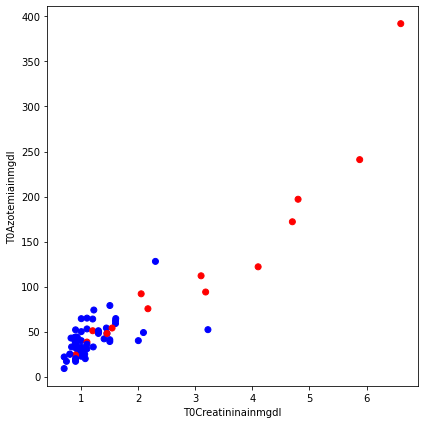

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame with the points is called 'predictive_df'
# Assuming the filtered DataFrame with the ICU labels is called 'filtered_df'

# Step 1: Extract the two features from predictive_df for male and female dataframes
feature1 = predictive_df['T0Creatininainmgdl']
feature2 = predictive_df['T0Azotemiainmgdl']

# Step 2: Extract the ICU labels from filtered_df for male and female dataframes
ICU_labels = filtered_df['ICU']

# Step 3: Map the ICU labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in ICU_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))

plt.scatter(feature1, feature2, c=colors)
plt.xlabel('T0Creatininainmgdl')
plt.ylabel('T0Azotemiainmgdl')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


***We see that there is clearly information in these features on wether or not the patient will go to ICU***

***But we also see that these features are strongly correlated to each other and one does not bring a lot of additionnal information than the other***

***One way to highlight it is to compute a decision tree***

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

[Text(0.625, 0.9, 'T0Azotemiainmgdl <= 74.714\ngini = 0.313\nsamples = 72\nvalue = [58, 14]'),
 Text(0.4166666666666667, 0.7, 'GCS <= 0.5\ngini = 0.15\nsamples = 61\nvalue = [56, 5]'),
 Text(0.25, 0.5, 'T0SodioinmEql <= 127.5\ngini = 0.069\nsamples = 56\nvalue = [54, 2]'),
 Text(0.16666666666666666, 0.3, 'T0Bilirubinadirettainmgdl <= 1.46\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(0.5833333333333334, 0.5, 'T0LDHinUL <= 814.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.7, 'T0ALTinUL <= 24.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.916

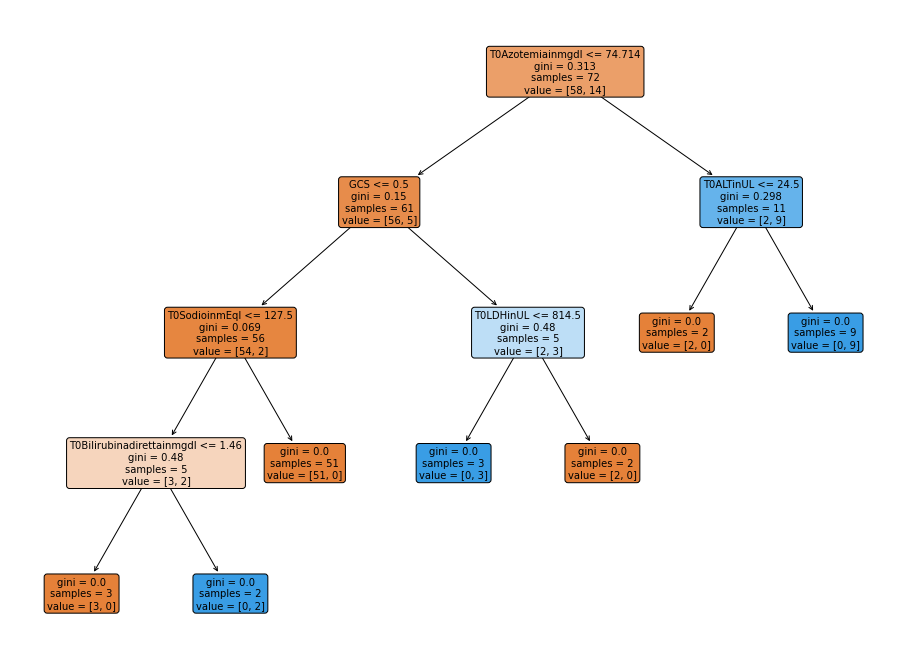

In [10]:
# Step 1: Get all the features from predictive_df

features = predictive_df

# Step 2: Get the target variable from filtered_df
target = filtered_df['ICU']

# Step 3: Create a decision tree classifier with minimum 2 sample in each leaf 
clf = DecisionTreeClassifier(min_samples_leaf=2)
clf.fit(features, target)

# Step 4: Set a larger figure size
plt.figure(figsize=(16, 12))

# Step 5: Print the decision tree
tree.plot_tree(clf, feature_names=features.columns, filled=True, rounded=True, fontsize=10)


***We can see that here, only Azotemia (2nd most correlated) is used and Creatinine (1st most correlated) is never used*** 

***Other combinaison of feature work in much better synergy. Like for example Azotemia, GCS and therapeutic delay***

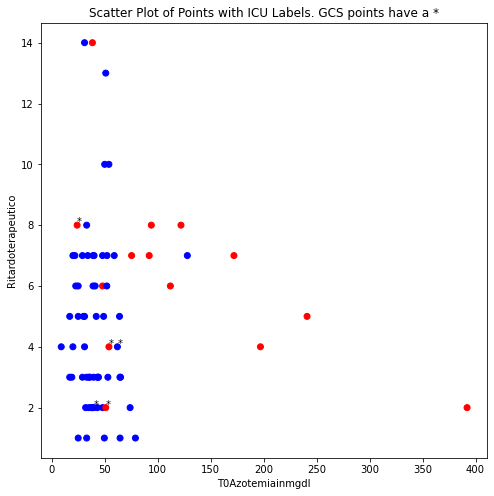

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame with the points is called 'predictive_df'
# Assuming the filtered DataFrame with the ICU labels is called 'filtered_df'

# Step 1: Extract the two features from predictive_df
feature1 = predictive_df['T0Azotemiainmgdl']
feature2 = predictive_df['Ritardoterapeutico']

# Step 2: Extract the ICU labels from filtered_df
icu_labels = filtered_df['ICU']

# Step 3: Extract the GCS feature from predictive_df
gcs_feature = predictive_df['GCS']

# Step 4: Map the ICU labels to colors
colors = ['red' if label == 1 else 'blue' for label in icu_labels]

# Step 5: Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(feature1, feature2, c=colors)

# Step 6: Add labels and title
plt.xlabel('T0Azotemiainmgdl')
plt.ylabel('Ritardoterapeutico')
plt.title('Scatter Plot of Points with ICU Labels. GCS points have a *')

for i, txt in enumerate(predictive_df.index):
    if gcs_feature[i] == 1:
        plt.annotate('*', (feature1[i], feature2[i]), fontsize=10)
   


# Step 7: Show the plot
plt.show()


***Another representation is the following in 3D :***

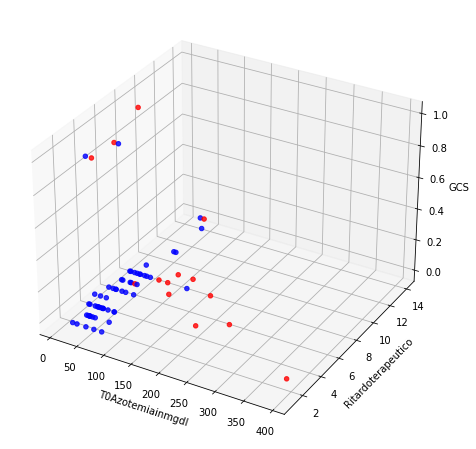

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is stored in the 'features' DataFrame
# Assuming the 'filtered_df' DataFrame contains the ICU values

# Create a larger 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

features = predictive_df[['GCS', 'T0Azotemiainmgdl', 'Ritardoterapeutico']]
# Extract the coordinates from the 'features' DataFrame
x = features['T0Azotemiainmgdl']
y = features['Ritardoterapeutico']
z = features['GCS']


# Color mapping based on ICU values
icu_values = filtered_df['ICU']
colors = ['red' if icu == 1 else 'blue' for icu in icu_values]

# Plot the points in 3D with color mapping
ax.scatter(x, y, z, c=colors, marker='o', alpha=0.8)


# Set labels for each axis
ax.set_zlabel('GCS')
ax.set_xlabel('T0Azotemiainmgdl')
ax.set_ylabel('Ritardoterapeutico')

# Show the 3D graph
plt.show()


***Data looks almost linearly separable. One way to show it is to train a Support Vector Classifier on it*** 

Confusion Matrix:
[[55  3]
 [ 3 11]]


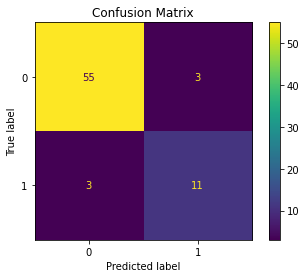

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get all the features from predictive_df
features = predictive_df[['GCS', 'T0Azotemiainmgdl', 'Ritardoterapeutico']]

# Step 2: Get the target variable from filtered_df
target = filtered_df['ICU']

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Create an SVM classifier
clf = SVC()
clf.fit(scaled_features, target)

# Step 5: Make predictions on the training data
predictions = clf.predict(scaled_features)

# Step 6: Calculate the confusion matrix
confusion = confusion_matrix(target, predictions)
print("Confusion Matrix:")
print(confusion)


# Step 7: Calculate the confusion matrix
confusion = confusion_matrix(target, predictions)

# Step 8: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


***Other combinaison of features like Creatinine (1st most correlated) and GCS have good results***

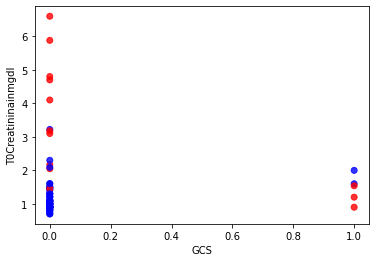

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

features = predictive_df[['GCS', 'T0Creatininainmgdl']]

# Extract the coordinates from the 'features' DataFrame
y = features['T0Creatininainmgdl']
x = features['GCS']

# Color mapping based on ICU values
icu_values = filtered_df['ICU']
colors = ['red' if icu == 1 else 'blue' for icu in icu_values]

# Plot the points in 2D with color mapping
plt.scatter(x, y, c=colors, marker='o', alpha=0.8)

# Set labels for each axis
plt.ylabel('T0Creatininainmgdl')
plt.xlabel('GCS')

# Show the 2D graph
plt.show()


Confusion Matrix:
[[55  3]
 [ 4 10]]


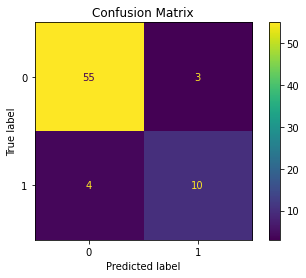

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get all the features from predictive_df
features = predictive_df[['GCS', 'T0Creatininainmgdl']]

# Step 2: Get the target variable from filtered_df
target = filtered_df['ICU']

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Create an SVM classifier
clf = SVC()
clf.fit(scaled_features, target)

# Step 5: Make predictions on the training data
predictions = clf.predict(scaled_features)

# Step 6: Calculate the confusion matrix
confusion = confusion_matrix(target, predictions)
print("Confusion Matrix:")
print(confusion)


# Step 7: Calculate the confusion matrix
confusion = confusion_matrix(target, predictions)

# Step 8: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
